In [9]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')

#############
###Imports#####
#############
from numerical.adi_ca_function_openclosed_nodilution_preMask import adi_ca_openclosed_nodilution_preMask
from numerical.adi_ca_function_openclosed_nodilution_preMask_numba import adi_ca_openclosed_nodilution_preMask as adi_ca_openclosed_nodilution_preMask_numba
from numerical.plotting_numerical import *


import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
#############
###execution parameters#####
#############
shape = 'ca'
# parID = int(sys.argv[1])
parID = 1
circuit_n=2
variant= 0
n_species=6
# folder = 'circuit2variant48257gaussian0.1nsr'


nsamples =  2000
save_figure = False
tqdm_disable = False #disable tqdm
# boundarycoeff = float(sys.argv[6])
boundarycoeff = 1.7
p_division=0.5;seed=1

# open parameter dictionaries
lsa_df= pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_circuit%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,parametersets_n), "rb" ) )
par_dict = lsa_df.loc[parID].to_dict()
# par_dict = general_df.iloc[parID].to_dict()

D = np.zeros(n_species)
D[0]=d_A
D[1]=d_B
print(par_dict)
# par_dict['mulva'] = par_dict['mulva'] + np.log(2)*p_division

#solver parameters
L=8; dx =0.05; J = int(L/dx)
T =125; dt = 0.05; N = int(T/dt)
p_division=0.5;seed=1

cell_matrix_record = pickle.load( open(modellingpath + "/3954/paper/out/numerical/masks/caMask_seed%s_pdivision%s_L%s_J%s_T%s_N%s.pkl"%(seed,p_division,L,J,T,N), "rb" ) )
daughterToMotherDictList = pickle.load( open(modellingpath + "/3954/paper/out/numerical/masks/caMemory_seed%s_pdivision%s_L%s_J%s_T%s_N%s.pkl"%(seed,p_division,L,J,T,N), "rb" ) )
T =1; dt = 0.05; N = int(T/dt)
filename= lambda parID: 'circuit%r_variant%s_bc%s_%s_ID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundarycoeff, shape,parID,L,J,T,N)
D[:2] = [par_dict['DA'],par_dict['DB'] ]


{'DA': 1.0, 'DB': 0.007733991281019643, 'bA': 0.01, 'bB': 0.01, 'bC': 0.01, 'bD': 0.01, 'bE': 0.01, 'bF': 0.01, 'VA': 133.4111448153659, 'VB': 47.912664311071026, 'VC': 978.2661633126525, 'VD': 160.7404467982817, 'VE': 103.93236276316331, 'VF': 46.10000623683201, 'Kda': 970.9938562070984, 'Kab': 17.814372550727914, 'Keb': 440.812661888375, 'Kbd': 68.58360666119798, 'Kfe': 412.25574424797765, 'Kee': 264.8036584284209, 'Kce': 31.938330823697545, 'muLVA': 0.0010620170115946998, 'muASV': 1.163147615691071, 'nbd': 2.0, 'nab': 1.0, 'nda': 1.0, 'nfe': 4.0, 'nee': 4.0, 'neb': 4.0, 'nce': 1.0}


In [10]:
U_record,U_final =  adi_ca_openclosed_nodilution_preMask(par_dict,L,dx,J,T,dt,N, circuit_n, n_species,D,cell_matrix_record, daughterToMotherDictList,tqdm_disable=False, p_division=0.5,stochasticity=0, seed=1,growth='Slow', boundarycoeff=boundarycoeff)


100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


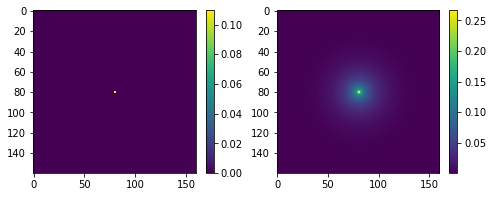

In [11]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_final[-1])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(U_final[0])
plt.colorbar(shrink=.75)
plt.show()